# Predicting the Success of Bank Telemarketing 

Import libraries

In [98]:
#Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Origin and Description

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Further details of the origins of the data can be found in the link:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014



Load the dataset

In [99]:
#load and read the csv file containing the dataset
bank_df = pd.read_csv('Data/bank-additional-full.csv', sep= ";" )
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Business Understanding and Overview of Project  

Acquiring new prospects in order to accumulate additional assets under management is one of the key important avenues of growth for a financial institution. As prospects and clients earn a bank's trust, they will become more inclined to deposit their savings with the bank. Once a bank earns the trust of its users, assets become revenue streams as clients begin to venture into opening additional accounts, on top of their savings account, such as brokerage accounts, retirement accounts, line of credits, mortgages, as well as private equity and venture capital accounts. In a world where interest rates are very low, it becomes even more imperative to capture the trust of prospects and clients, as traditional banks and neo-banks compete for assets.

In today's financial services industry, client data has become another key differentiator for an institution's abiliity to surivive in this hyper-competitve environment. One key way for financial institutions to provide a better overall customer experience for its prospects and clients is to leverage the power of machine learning, specifically when it pertains to prospecting clients and soliciting new financial products while minimzing the intrusive nature of soliciting as well as the time and resources dedicated to soliciting new products.

The core business prolblem at hand relates to building a classfier to predict whether a client will subscribe to a term deposit. On top of building a predictive classifier, we would also want to determine the key influential factors that drive a prospect or client's decision to subscribe to a term deposit. By building a predictive model and identifying key factors, banks can improve their sales pipeline and increase effciency by reducing time, resources, and costs when reaching out to prospects and clients, while maintaining a non-invasive relationship with all clients.

# Exploratory Data Analysis 

We will be going over the dataset for this project and reviewing the data for further preprocessing purposes down the line. 

As described from the abstract of the dataset, we notice that the first 20 columns are attributes related to clients, with the last remaining column as the target variable 'y'. The target variable denotes whether clients subscribed to ther term deposit or not, indicated as 'yes' or 'no'. 

In [100]:
#review first 5 entries of bank telemarketing dataset.  
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [101]:
#review shape of dataframe
bank_df.shape

(41188, 21)

Here, we notice that some of the columns are object types, implying that these columns are categorical. We also notice that other columns are continuous. As we know, Machine Learning Algorithms cannot take object types, thus we will eventually have to preprocess the categorical columns later on for modeling purposes.  

In [102]:
#review dtype of all 21 columns across 41,118 entries
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Recognize that the dataframe contains different dtypes that will need to be cleaned up for modeling. We exclude the target variable 'y'.  

In [103]:
#create a variable that holds all continous variables for later processing based on dtypes as int64 and float 64 
continuous = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#create a variable that holds all categorical variables for later processing based on dtypes as object, excluding our target 'y' variable
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

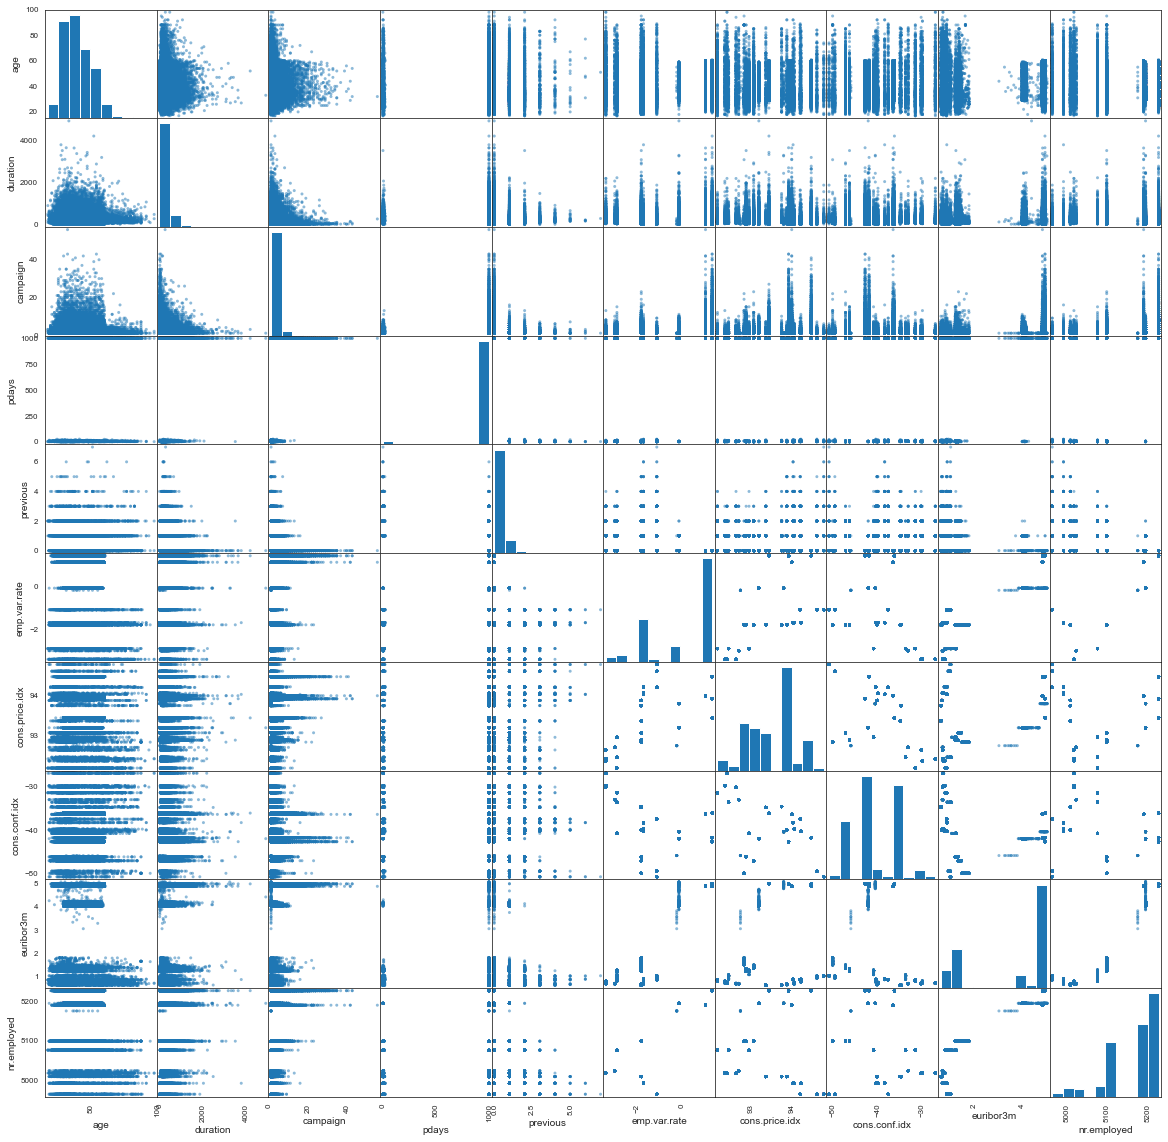

In [104]:
#visualize a scatter matrix for all columns to identify continuous features for further processing
pd.plotting.scatter_matrix(bank_df, figsize = [20, 20]);
plt.show()

From the summary statistics below, we notice that for the feature 'pdays', although a continuous variable, contains '999' for majority of values. As such, we will convert pdays from continuous to categorical during the preprocessing phase.  

In [105]:
#summary statistics of all features
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


This dataset contains no null values and therefore no columns will need to be dropped. 

In [106]:
#check for any null values. 
bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Check on 'y' feature for any class imbalance. In this instance, 'y' denotes that customers subscribed and opened the bank's term deposit. Here we've identified that this data has a class imbalance in which only 11.3% of customers subscribed to the bank's term deposit, while the remaining 88.7% of customers did not. We will also eventually be converting our target "y" column into '1' and '0' instead of 'yes' and 'no'.  

In [107]:
#check for class imbalance on target Y variable. 
bank_df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

# Functions 

For organizational purposes, this section will be utilized to store all functions used in this project. 

In [108]:
def bargraph_target(feature, dataset):
    
    '''
    This function serves to plot out each categorical column feature against the 'y' target variable to visuzlize the relationship 
    between each feature and whether customers subscribed to the term deposit (y or n).
    This function takes in the dataframe and illustrates each category against the target variable. '''
        
    plt.figure(figsize=(15,5))
    Y = bank_df[feature]
    total = len(Y)*1
    #plot against target 'y'
    ax = sns.countplot(x = feature, data = dataset, hue = "y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()


In [109]:
def distplot_continuous(feature):
    '''
    This function serves to plot out each continuous column feature to visualize the distribution of continuous variables.
    '''
    %matplotlib inline
    plt.figure(figsize=(10,8))
    sns.distplot(feature)
    return plt.show();

In [110]:
def plot_feature_importances(model):
    '''
    This function serves to plot out all feature importances across all models deployed.'''
    
    n_features = X_train_scaled.shape[1]
    plt.figure(figsize=(8,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_scaled.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [111]:
def model_metrics(model, actual = y_test, X_train_scaled = X_train_scaled, X_test = X_test, y_train = y_train):
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    
    print("Train Scores")
    print("log loss: ", log_loss(y_train, pred_train))
    print("accuracy: ", accuracy_score(y_train, pred_train))
    print("precision:", precision_score(y_train, pred_train))
    print("recall:   ", recall_score(y_train, pred_train))
    plot_confusion_matrix(model, X_train_scaled, y_train)
    
    print("Test Scores")
    print("log loss: ", log_loss(actual, pred_test))
    print("accuracy: ", accuracy_score(actual, pred_test))
    print("precision:", precision_score(actual, pred_test))
    print("recall:   ", recall_score(actual, pred_test))
    
    


In [112]:
def model_evaluation(y_pred,y_score):
    
    cm = confusion_matrix(y_test, y_pred)
    
    true_negative, false_positive, false_negative, true_positive = cm[0,0], cm[0,1], cm[0,1], cm[0,1]

    plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    #print('Training Set Metrics:')
    print('Accuracy:   {}'.format(round(accuracy,4)))
    print('Precision:  {}'.format(round(precision,4)))
    print('Recall:     {}'.format(round(recall,4)))
    print('F1          {}'.format(round(f1,4)))
    print('AUC:        {}'.format(round(auc(fpr, tpr),4)))

In [113]:
def roc_curve(fpr, tpr):
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    plt.figure(figsize=(10,6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Target Variable Preprocessing

From the exploratory analysis above, we've identified that we will need to replace 'no' and 'yes' with '0' and '1' for our target variable column, 'y'.

In [114]:
bank_df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [115]:
bank_df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [116]:
#replace no with 0, yes with 1
bank_df['y'].replace({"no": 0, "yes": 1}, inplace = True)

We've replaced "no" with 0 and "yes" with 1 to make the target variable "y" numerical. 

# Variable Analysis - Categorical

We've recognized that our model contains categorical and continuous features. Here, we plot all categorical variables based on each category. It looks like 'housing', 'loan', and 'poutcome' all contain unknown values that may require further preprocessing. 

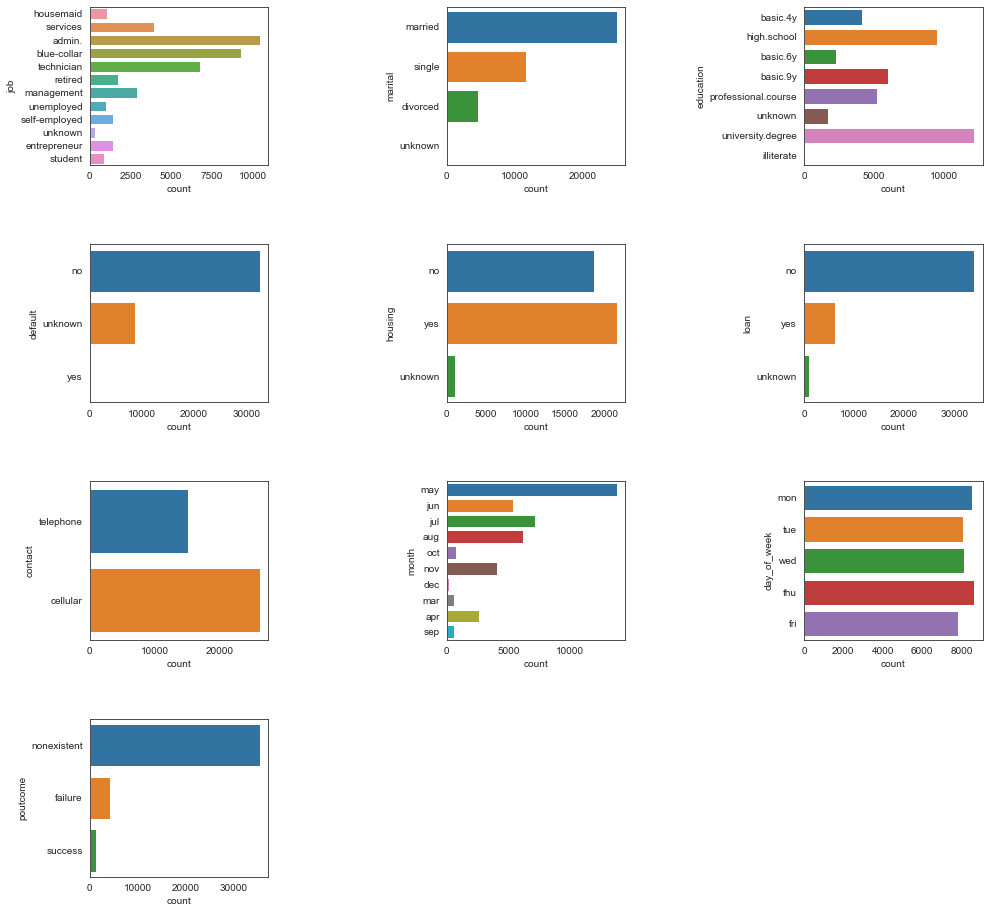

In [117]:
#visualize all categorical variables

fig, axes = plt.subplots(4, 3, figsize = (16,16))
plt.subplots_adjust(wspace = 1, hspace = 0.5)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical[i], data = bank_df, orient = "h", ax = ax)
    
plt.show();

We then called upon our function to visualize the relationship between each categorical feature and target feature to identify whether certain attributes within a category contain higher subscription frequency for the term deposit. 

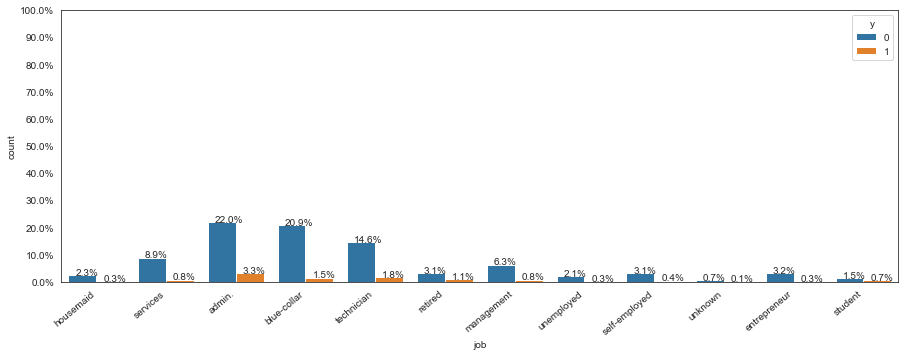

In [118]:
bargraph_target("job", bank_df)

Graphically, it looks like customers with admin jobs have the highest rate of subscribing across all occupations, followed by technicians and blue-collar workers. 

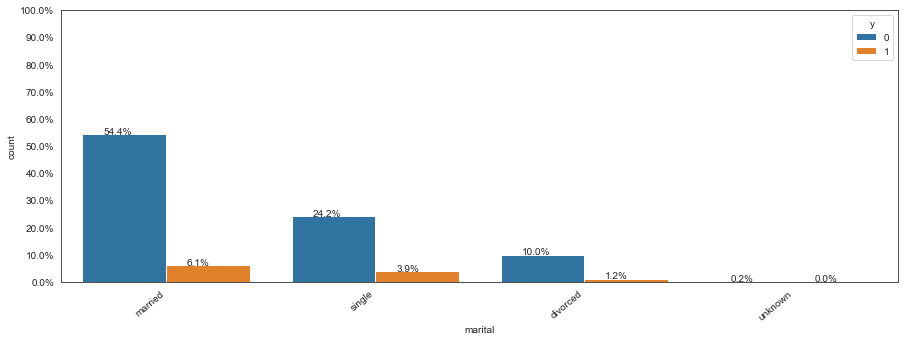

In [119]:
bargraph_target("marital", bank_df)

Married couples make a a large percentage of customers, but are also the most subscribed customers. 

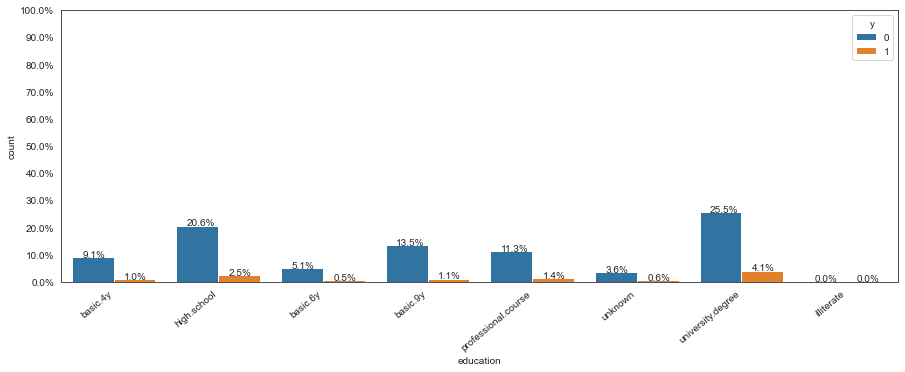

In [120]:
bargraph_target("education", bank_df)

Those with university degrees were the most highly subscribed subsector of customers to the bank's campaign. 

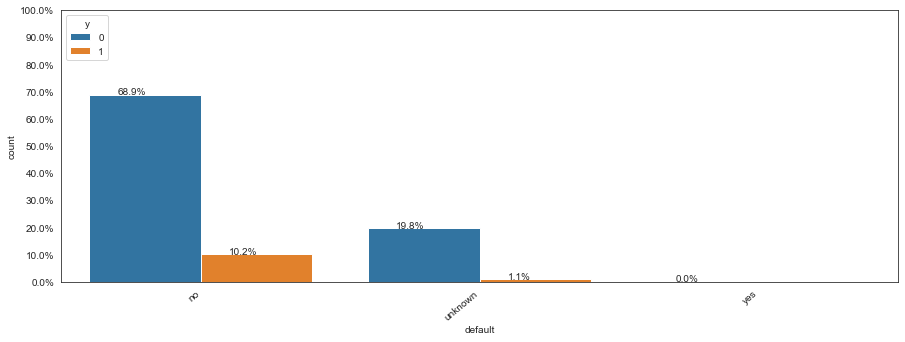

In [121]:
bargraph_target("default", bank_df)

Customers without any credit defaults were much highly likely to subscribe to the bank's campaign. 

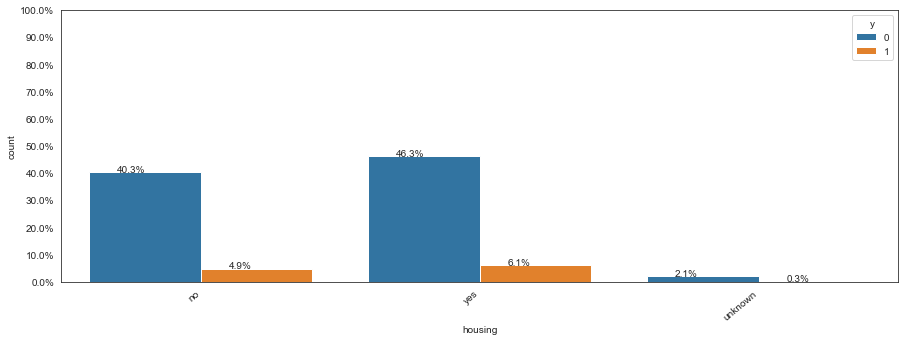

In [122]:
bargraph_target("housing", bank_df)

Those with a housing loan with the bank were likely to also have a term deposit. 

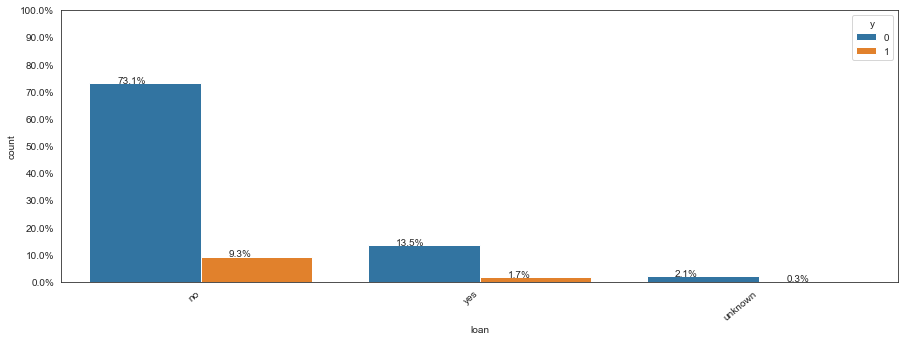

In [123]:
bargraph_target("loan", bank_df)

Customers who don't have a personal loan with the bank were more likely to subscribe to the term deposit. 

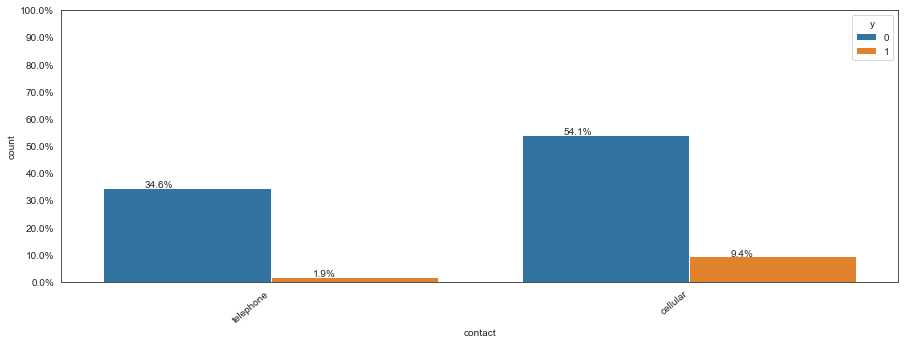

In [124]:
bargraph_target("contact", bank_df)

Customers who were contacted via cell phone were more likely to subscribe to the term deposit. 

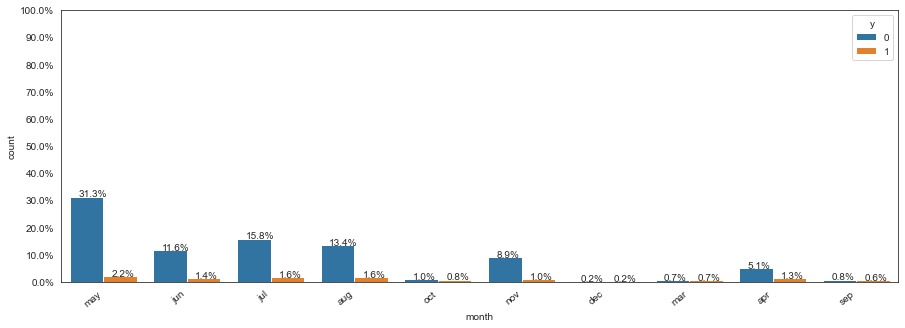

In [125]:
bargraph_target("month", bank_df)

May, followed by July and August, were the most recent months of contact prior to subscription. 

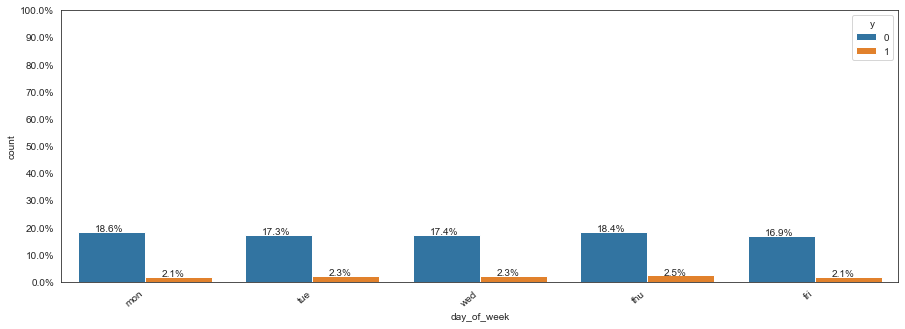

In [126]:
bargraph_target("day_of_week", bank_df)

Those who were last contacted on a Thursday had a slightly higher subscription rate. 

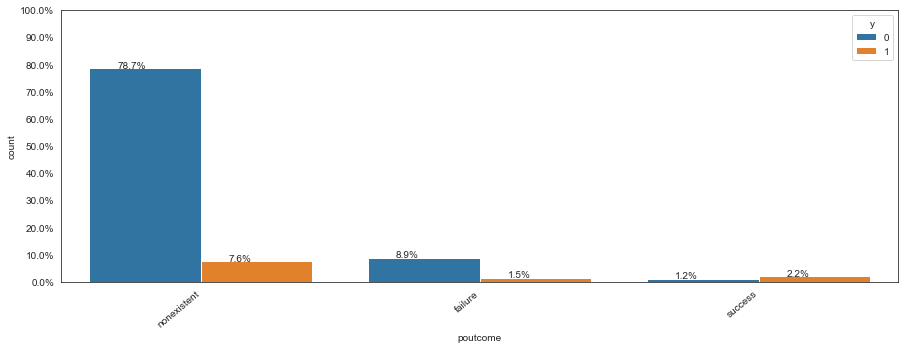

In [127]:
bargraph_target("poutcome", bank_df)

Most customers were tagged with nonexistent outcomes on the previous marketing campaign. This suggests most customers are contacted by the bank for the very first time. 

# Variable Analysis - Continuous 

After investigating categorical characteristics of the dataset, we will then look into all continuous features. 

In [128]:
#view all dtypes to identify continuous variables
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [129]:
continuous_bank_df = bank_df.select_dtypes(include=['float64', 'int64'])

In [130]:
#create a variable holding all continuous variables 
continuous_variables = bank_df.describe().columns


In [131]:
type(continuous_variables)

pandas.core.indexes.base.Index

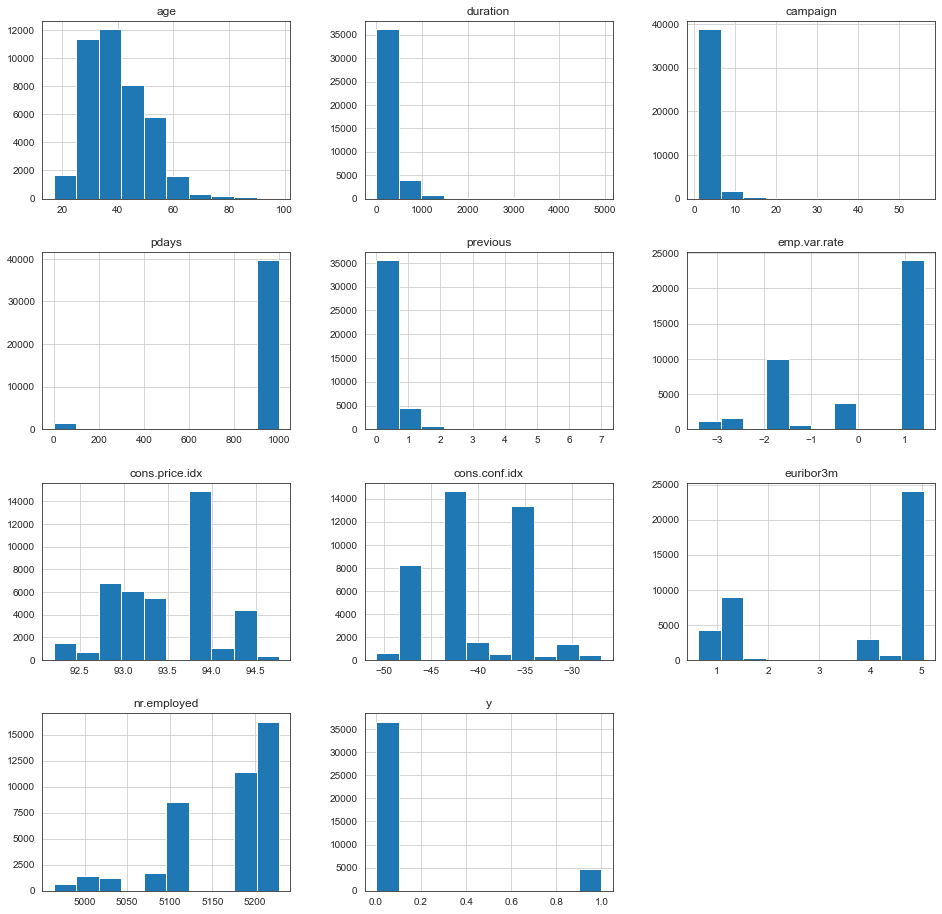

In [132]:
#visualize all continuous variables with histogram
bank_df.hist(column = continuous_variables, figsize = (16,16))
plt.show()

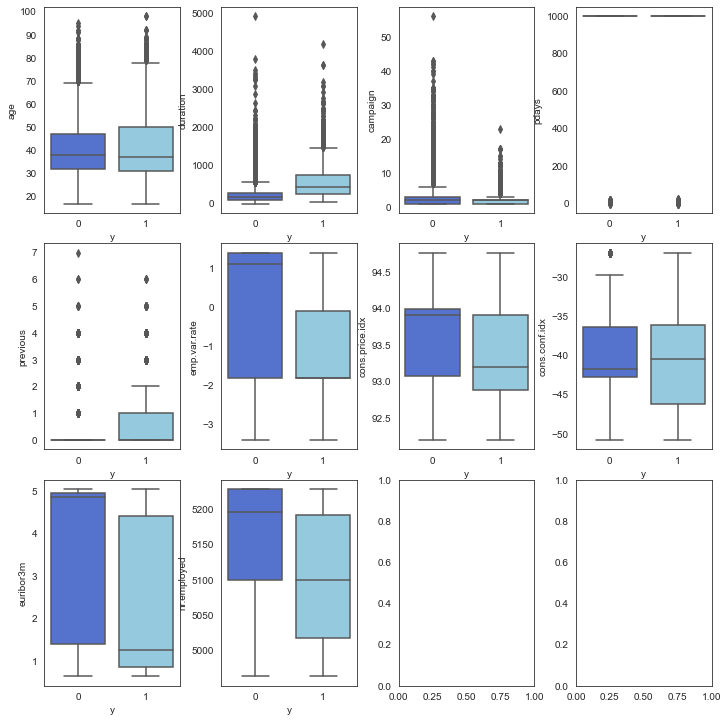

In [133]:
#plot out boxplots for all continuous variables vs. target to identify whether any features
#stand out in terms of difference between subscribed vs. not subscribed
fig, ax = plt.subplots(3, 4, figsize=(10, 10))
fig.tight_layout()
palette_color = {0: "royalblue", 1: "skyblue"}
for feature, subplot in zip(continuous_bank_df.drop('y', axis=1).columns, ax.flatten()):
    sns.boxplot(x = continuous_bank_df['y'], y = continuous_bank_df[feature],ax = subplot, palette = palette_color);



Looked at all continuous variables via boxplots to identify whether there are any trends. 

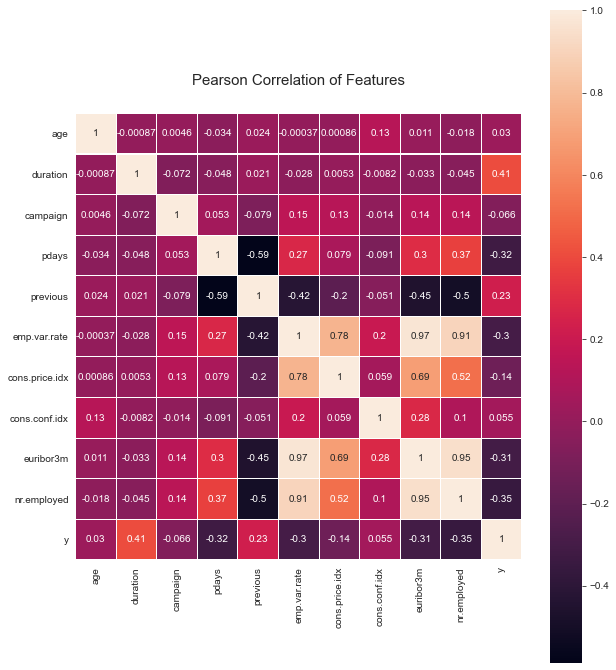

In [134]:
#plot heatmap of correlation matrix of continous varialbes to identify whether there's any collinearity
%matplotlib inline
corr = bank_df.corr()

fig, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson Correlation of Features", y=1.05, size=15);

Duration and previous both have high correlation to target variable. Note that the duration variable highly affects the output target. This attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call, the target variable y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

We then plot out the distribution plot of all continuous features below for exploratory purposes. 

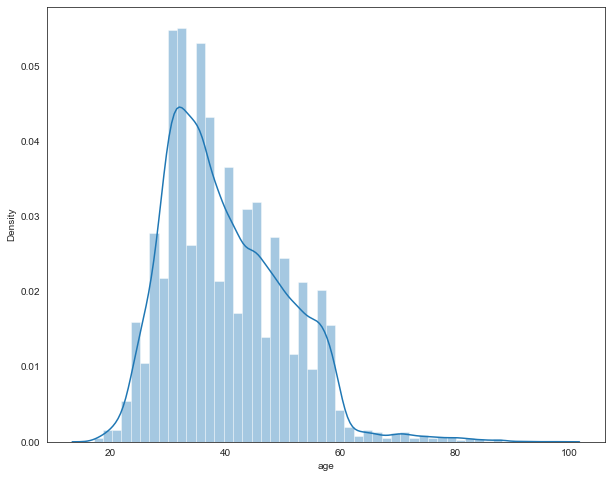

In [135]:
distplot_continuous(bank_df["age"])

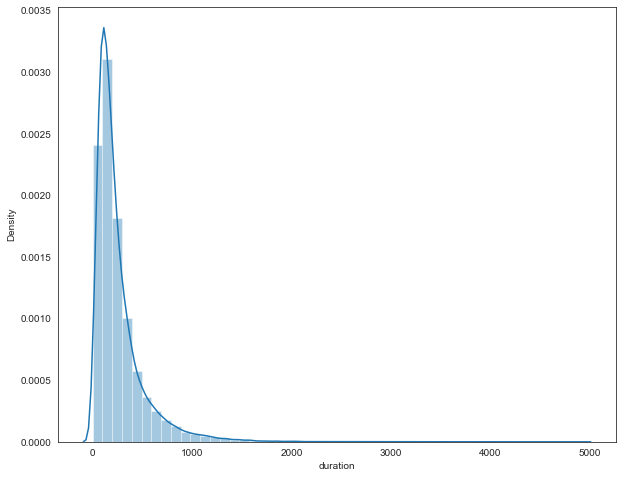

In [136]:
distplot_continuous(bank_df["duration"])

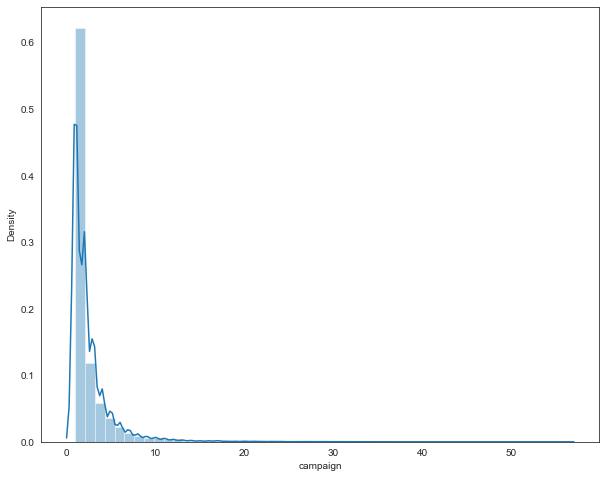

In [137]:
distplot_continuous(bank_df["campaign"])

For 'pdays', it looks like although it is a continuous feature, most values fall either as '999' or the number of previous days that has passed by after the client was last contacted from a previous campaign. Thus it is worth changing pdays to a categorical variable in terms of whether a client was contacted or not. 

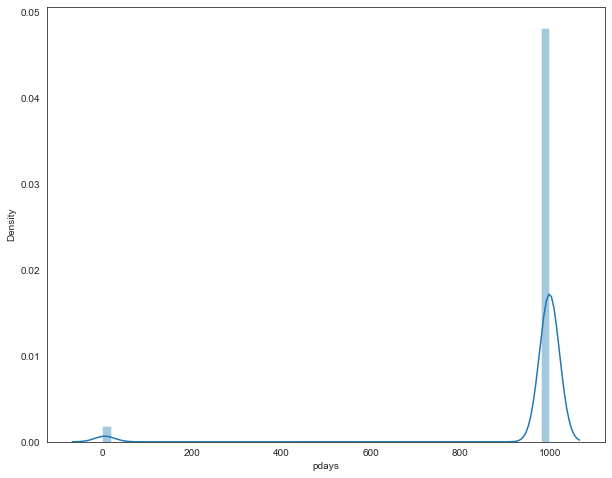

In [138]:
distplot_continuous(bank_df["pdays"])

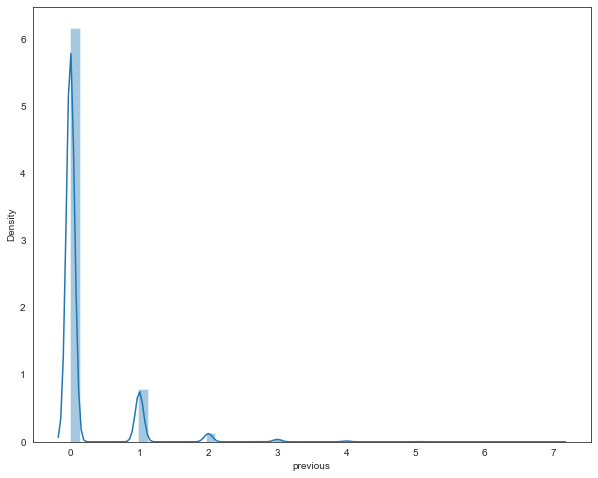

In [139]:
distplot_continuous(bank_df["previous"])

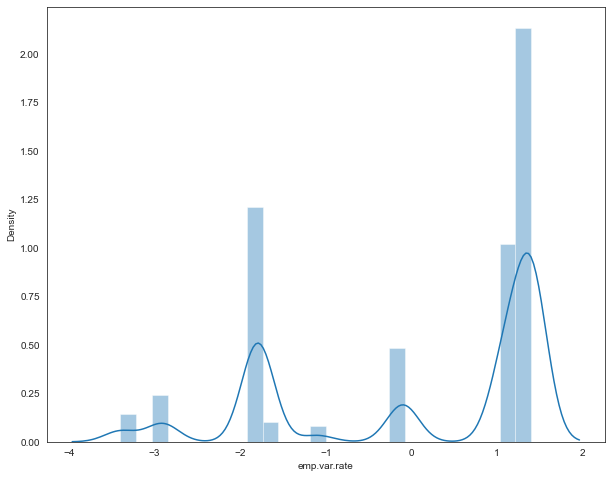

In [140]:
distplot_continuous(bank_df["emp.var.rate"])

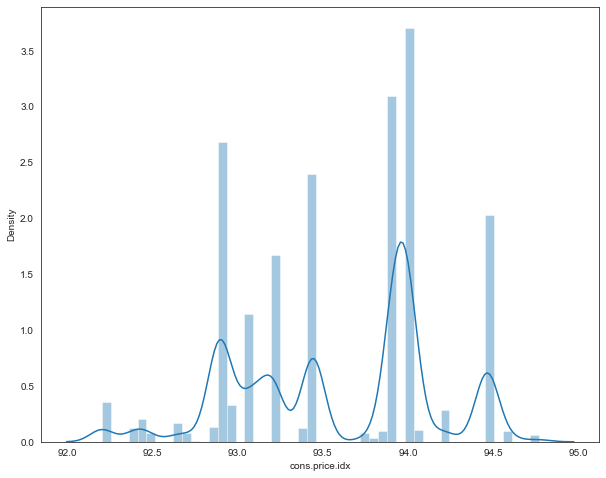

In [141]:
distplot_continuous(bank_df["cons.price.idx"])

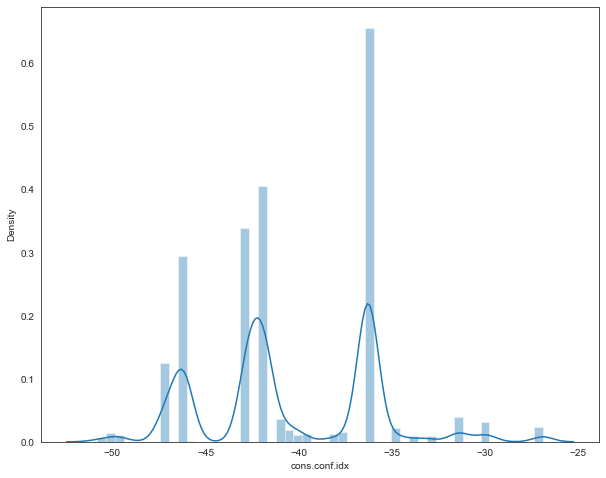

In [142]:
distplot_continuous(bank_df["cons.conf.idx"])

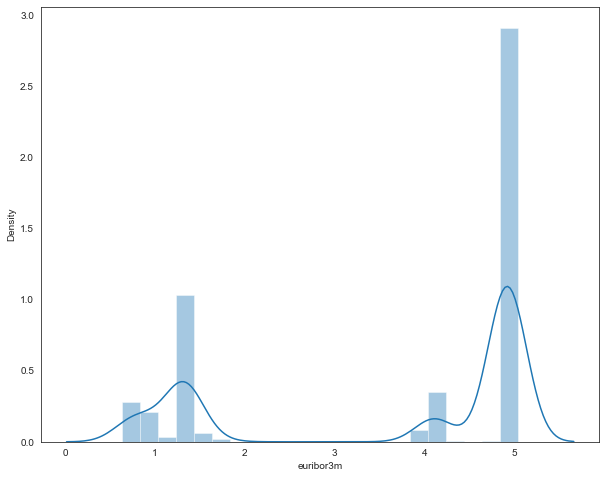

In [143]:
distplot_continuous(bank_df["euribor3m"])

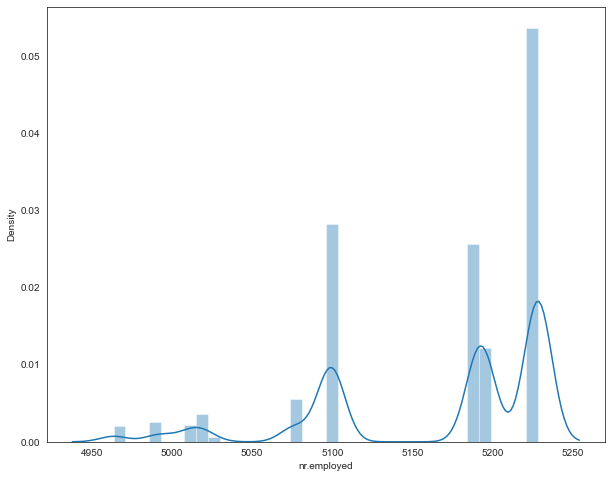

In [144]:
distplot_continuous(bank_df["nr.employed"])

# Data Preprocessing

In [145]:
#identify new df with duplicated values
bank_df_duplicated = bank_df[bank_df.duplicated(keep = "last")]
bank_df_duplicated

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


In [146]:
#check on shape of duplicated dataframe
bank_df_duplicated.shape

(12, 21)

In [147]:
#drop duplicates
bank_df = bank_df.drop_duplicates()

In [148]:
#check on dataframe after duplicates have been dropped. We see that we now decreased our rows by the 12 duplicated entries from 41,188 to 41,176
bank_df.shape

(41176, 21)

In [149]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Convert pdays from continuous to categorical, as most values are 999

In [150]:
#convert pdays from numeric to categorical
bank_df['pdays'] = ([0 if each == 999 else 1 for each in bank_df['pdays']])
bank_df['pdays']

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: pdays, Length: 41176, dtype: int64

In [151]:
#create a variable that holds all continous variables for later processing. Notice that we removed 'pdays'. 
continuous = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#create a variable that holds all categorical variables for later processing, this time adding pdays from continuous to categorical
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays']

Separating Independent and Target Variables 

In [152]:
#dropping target variable out of predictors
X = bank_df.drop('y', axis = 1)

#setting target with y 
y = bank_df['y']

Train Test Split

In [153]:
#import train test split
from sklearn.model_selection import train_test_split

#first train test split to obtain training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#second train test split to obtain training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.50, random_state = 42)

#X_rest = X_train 
#y_rest = y_train
#X_cv = X_val
#y_cv = y_val

In [154]:
#checking for shape sizing of split data 
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)


X_train: (16470, 20)
X_val: (16470, 20)
X_test: (8236, 20)
y_train: (16470,)
y_val: (16470,)
y_test: (8236,)


Encoding Categorical Features

In [155]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'pdays']

In [156]:
bank_df_categorical = X_train[categorical]
bank_df_continuous = X_train[continuous]

In [157]:
X_categorical = bank_df_categorical.columns
X_continouous = bank_df_continuous.columns

Creating a Pipeline for further preprocessing

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import xgboost as xg
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,log_loss, plot_confusion_matrix
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipeline

import warnings

In [159]:
from sklearn.pipeline import Pipeline 
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction import DictVectorizer

#create a pipeline to normalize via standard scaler our continuous variables and one hot encode our categorical variables

Continous_transform = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

Categorical_transform = Pipeline(steps=[
    ('ohe', OneHotEncoder(sparse = False))])
                          
    

pp = ColumnTransformer(transformers=[
    ('continous', Continous_transform, X_continouous),
    ('categorical', Categorical_transform, X_categorical)
    ])

In [160]:
#transform pipeline and convert back into dataframe

X_train_scaled = pp.fit_transform(X_train)
X_val_scaled = pp.transform(X_val)

In [161]:
#aggregating dataframes of categorical and continous variables into one dataframe

categorical_names = pp.transformers_[1][1].named_steps['ohe'].get_feature_names(X_categorical).tolist()
feature_names = list(X_continouous) + categorical_names

X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = feature_names)

# Dummy Model

In [162]:
#import baseline model library 
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

In [302]:
#create a dummy model for baseline analysis 
dummy_model = DummyClassifier(strategy = "most_frequent")

#fit the model
dummy_model.fit(X_train, y_train)

# score the model
dummy_model.score(X_train, y_train)
#classifier model
dummy_model.score(X_val, y_val)

#store as variable 
baseline_model_scoring = dummy_model.score(X_val, y_val)

baseline_model_scoring

0.8896174863387978

We see that the dummy model and the class imbalance reveal very similar scores as the dummy model is predicting on the majority class of 'no', which is around 88.73%

In [164]:
print(f" Dummy Model Score: {dummy_model.score(X_val, y_val)}")
print()
print(f" Class Imbalance: {bank_df['y'].value_counts(normalize=True)}")

 Dummy Model Score: 0.8896174863387978

 Class Imbalance: 0    0.887337
1    0.112663
Name: y, dtype: float64


# Model 1 - Logistic Regression Baseline Model 

The first model we will utilize is the Logistic Regression Model, in which we obtained an AUC score of 0.80 on the training data and 0.79 on the validation data. The MSE and RMSE obtained from our logistic model is 0.14 and 0.30 respectively. However, we know that there is a class imbalance in our dataset due to most clients not having a term deposit, thus we will subsequently utilize a balanced class weight in our logistic regression model to see if our model improves. 

In [303]:
#instantiate logistic regression model
logistic_model = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear', random_state = 42)

#fit the model
logistic_model.fit(X_train_scaled, y_train)

#predict on train
logistic_model_preds_train = logistic_model.predict(X_train_scaled)

#predict on validation 
logistic_model_preds = logistic_model.predict(X_val_scaled)

#store AUC score as variable
logreg_scoring = roc_auc_score(logistic_model_preds_train, y_train)

print(f" AUC score: {roc_auc_score(logistic_model_preds_train, y_train)}")
print('Classification Report on Training Data', "\n")
print(classification_report(y_train, logistic_model_preds_train))

print(f" AUC score: {roc_auc_score(logistic_model_preds, y_val)}")
print('Classification Report on Validation Data', "\n")
print(classification_report(y_val, logistic_model_preds))

 AUC score: 0.8064959361368254
Classification Report on Training Data 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14620
           1       0.68      0.45      0.54      1850

    accuracy                           0.91     16470
   macro avg       0.81      0.71      0.75     16470
weighted avg       0.91      0.91      0.91     16470

 AUC score: 0.7929091155942636
Classification Report on Validation Data 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14652
           1       0.65      0.43      0.52      1818

    accuracy                           0.91     16470
   macro avg       0.79      0.70      0.74     16470
weighted avg       0.90      0.91      0.90     16470



Our confusion matrix reveals a 0.86 accuracy score for our model, which is slightly worse than our baseline model of guessing the majority class. 

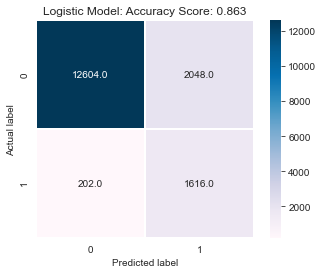

In [202]:
score = round(accuracy_score(y_val, logistic_model_preds),3) 
confusion_matrix = cm(y_val, logistic_model_preds)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Logistic Model: Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

Error Evaluation

In [199]:
mae_train = mean_absolute_error(logistic_model_preds_train, y_train)
mse_train = mean_squared_error(logistic_model_preds_train, y_train)
rmse_train = np.sqrt(mse)

mae_val = mean_absolute_error(logistic_model_preds, y_val)
mse_val = mean_squared_error(logistic_model_preds, y_val)
rmse_val = np.sqrt(mse)

print('Logistic Model Error Evaluation')
print()
print('Mean Absolute Error Train (MAE): %.2f' % mae_train)
print('Mean Squared Error Train (MSE): %.2f' % mse_train)
print('Root Mean Squared Error Train (RMSE): %.2f' % rmse_train)
print()
print('Mean Absolute Error Validation (MAE): %.2f' % mae_val)
print('Mean Squared Error Validation (MSE): %.2f' % mse_val)
print('Root Mean Squared Error Validation (RMSE): %.2f' % rmse_val)
print("\n")

Logistic Model Error Evaluation

Mean Absolute Error Train (MAE): 0.13
Mean Squared Error Train (MSE): 0.13
Root Mean Squared Error Train (RMSE): 0.30

Mean Absolute Error Validation (MAE): 0.14
Mean Squared Error Validation (MSE): 0.14
Root Mean Squared Error Validation (RMSE): 0.30




AUC: 0.71263708946475


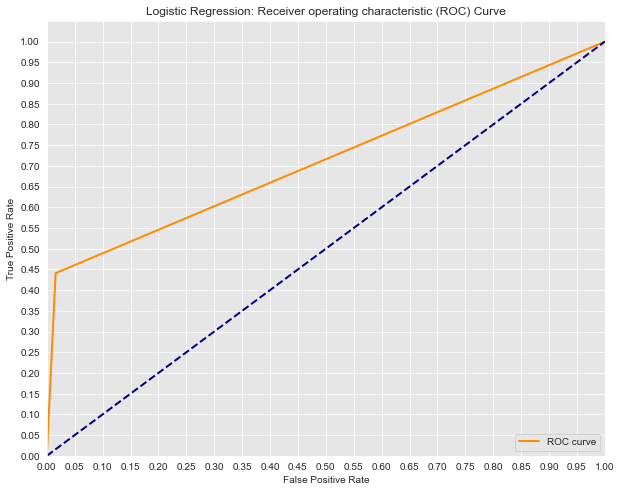

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

fpr, tpr, thresholds = roc_curve(logistic_model_preds, y_val)
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression: Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Model 2 - Logistic Regression (class weight = balanced)

In our balanced class weight model, we obtained an AUC score of 0.72 on the training data and 0.71 on the validation data. The MSE and RMSE obtained from our balanced model is 0.14 and 0.30 respectively. Unsurprisingly, our model's predictiability went down after our dataset has been balanced out.

In [304]:
#instantiate logistic regression model with class_weight as balanced, which 
# weights each class inversely proportional to their respective frequencies, giving our "yes" class heavier weights
logistic_model_balanced = LogisticRegression(fit_intercept = False, C = 1e12, class_weight = 'balanced', solver = 'liblinear', random_state = 42)

#fit the model
logistic_model_balanced.fit(X_train_scaled, y_train)

#predict on train
logistic_model_balanced_preds_train = logistic_model_balanced.predict(X_train_scaled)

#predict on validation 
logistic_model_balanced_preds_validation = logistic_model_balanced.predict(X_val_scaled)

#store as variable
logreg_balanced_scoring = roc_auc_score(logistic_model_balanced_preds_train, y_train)

print(f" AUC score: {roc_auc_score(logistic_model_balanced_preds_train, y_train)}")
print('Classification Report on Training Data', "\n")
print(classification_report(y_train, logistic_model_balanced_preds_train))

print(f" AUC score: {roc_auc_score(logistic_model_balanced_preds_validation, y_val)}")
print('Classification Report on Validation Data', "\n")
print(classification_report(y_val, logistic_model_balanced_preds_validation))

 AUC score: 0.7170560350321855
Classification Report on Training Data 

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     14620
           1       0.45      0.89      0.60      1850

    accuracy                           0.87     16470
   macro avg       0.72      0.88      0.76     16470
weighted avg       0.92      0.87      0.88     16470

 AUC score: 0.71263708946475
Classification Report on Validation Data 

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     14652
           1       0.44      0.89      0.59      1818

    accuracy                           0.86     16470
   macro avg       0.71      0.87      0.75     16470
weighted avg       0.92      0.86      0.88     16470



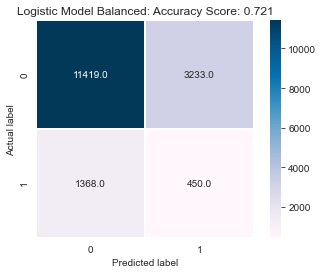

In [195]:
score = round(accuracy_score(y_val, logistic_model_balanced_preds_train),3) 
confusion_matrix = cm(y_val, logistic_model_balanced_preds_train)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Logistic Model Balanced: Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [200]:
mae_train = mean_absolute_error(logistic_model_balanced_preds_train, y_train)
mse_train = mean_squared_error(logistic_model_balanced_preds_train, y_train)
rmse_train = np.sqrt(mse)

mae_val = mean_absolute_error(logistic_model_balanced_preds_validation, y_val)
mse_val = mean_squared_error(logistic_model_balanced_preds_validation, y_val)
rmse_val = np.sqrt(mse)
print('Logistic Model Error Evaluation (class weight = balanced)')
print()
print('Mean Absolute Error Train (MAE): %.2f' % mae_train)
print('Mean Squared Error Train (MSE): %.2f' % mse_train)
print('Root Mean Squared Error Train (RMSE): %.2f' % rmse_train)
print()
print('Mean Absolute Error Validation (MAE): %.2f' % mae_val)
print('Mean Squared Error Validation (MSE): %.2f' % mse_val)
print('Root Mean Squared Error Validation (RMSE): %.2f' % rmse_val)
print("\n")

Logistic Model Error Evaluation (class weight = balanced)

Mean Absolute Error Train (MAE): 0.13
Mean Squared Error Train (MSE): 0.13
Root Mean Squared Error Train (RMSE): 0.30

Mean Absolute Error Validation (MAE): 0.14
Mean Squared Error Validation (MSE): 0.14
Root Mean Squared Error Validation (RMSE): 0.30




# Model 3 - Decision Tree

In [356]:
decision_tree_model = DecisionTreeClassifier()

In [357]:
decision_tree_param_grid = {'criterion':['gini', 'entropy'],
                            'max_depth':np.arange(1, 15, 2),
                            'min_samples_split':np.arange(5, 100, 5),
                            'min_samples_leaf':np.arange(5,120,5)
                            }
                           

In [358]:
decision_tree_grid_search = GridSearchCV(estimator = decision_tree_model, 
                                        param_grid = decision_tree_param_grid,
                                        scoring = 'roc_auc',
                                        cv = 3,
                                        n_jobs = -1)

In [360]:
decision_tree_grid_search.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [361]:
decision_tree_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 105,
 'min_samples_split': 5}

In [362]:
#predict on train
decision_tree_preds_train = decision_tree_grid_search.predict(X_train_scaled)

#predict on validation
decision_tree_preds_validation = decision_tree_grid_search.predict(X_val_scaled)

#store as variable
decision_tree_scoring = roc_auc_score(decision_tree_preds_train, y_train)

print(f" AUC score: {roc_auc_score(decision_tree_preds_train, y_train)}")
print('Classification Report on Training Data', "\n")
print(classification_report(y_train, decision_tree_preds_train))

print(f" AUC score: {roc_auc_score(decision_tree_preds_validation, y_val)}")
print('Classification Report on Validation Data', "\n")
print(classification_report(y_val, decision_tree_preds_validation))

 AUC score: 0.8088430516308054
Classification Report on Training Data 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14620
           1       0.68      0.46      0.55      1850

    accuracy                           0.92     16470
   macro avg       0.81      0.72      0.75     16470
weighted avg       0.91      0.92      0.91     16470

 AUC score: 0.788031709111674
Classification Report on Validation Data 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14652
           1       0.64      0.43      0.52      1818

    accuracy                           0.91     16470
   macro avg       0.79      0.70      0.73     16470
weighted avg       0.90      0.91      0.90     16470



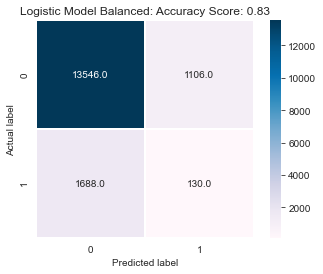

In [363]:
score = round(accuracy_score(y_val, decision_tree_preds_train),3) 
confusion_matrix = cm(y_val, decision_tree_preds_train)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Logistic Model Balanced: Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [364]:
mae_train = mean_absolute_error(decision_tree_preds_train, y_train)
mse_train = mean_squared_error(decision_tree_preds_train, y_train)
rmse_train = np.sqrt(mse)

mae_val = mean_absolute_error(decision_tree_preds_validation, y_val)
mse_val = mean_squared_error(decision_tree_preds_validation, y_val)
rmse_val = np.sqrt(mse)

print('Decision Tree Error Evaluation')
print()
print('Mean Absolute Error Train (MAE): %.2f' % mae_train)
print('Mean Squared Error Train (MSE): %.2f' % mse_train)
print('Root Mean Squared Error Train (RMSE): %.2f' % rmse_train)
print()
print('Mean Absolute Error Validation (MAE): %.2f' % mae_val)
print('Mean Squared Error Validation (MSE): %.2f' % mse_val)
print('Root Mean Squared Error Validation (RMSE): %.2f' % rmse_val)
print("\n")

Decision Tree Error Evaluation

Mean Absolute Error Train (MAE): 0.08
Mean Squared Error Train (MSE): 0.08
Root Mean Squared Error Train (RMSE): 0.30

Mean Absolute Error Validation (MAE): 0.09
Mean Squared Error Validation (MSE): 0.09
Root Mean Squared Error Validation (RMSE): 0.30




AUC: 0.788031709111674


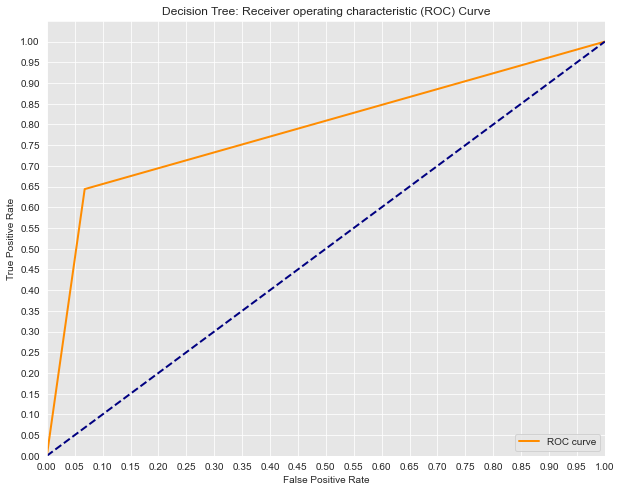

In [365]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

fpr, tpr, thresholds = roc_curve(decision_tree_preds_validation, y_val)
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree: Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [366]:
best_params_decision_tree = DecisionTreeClassifier(criterion = 'gini',
                                                   max_depth = 9, 
                                                   min_samples_leaf = 105,
                                                   min_samples_split = 5)
                                       
best_params_decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=105, min_samples_split=5)

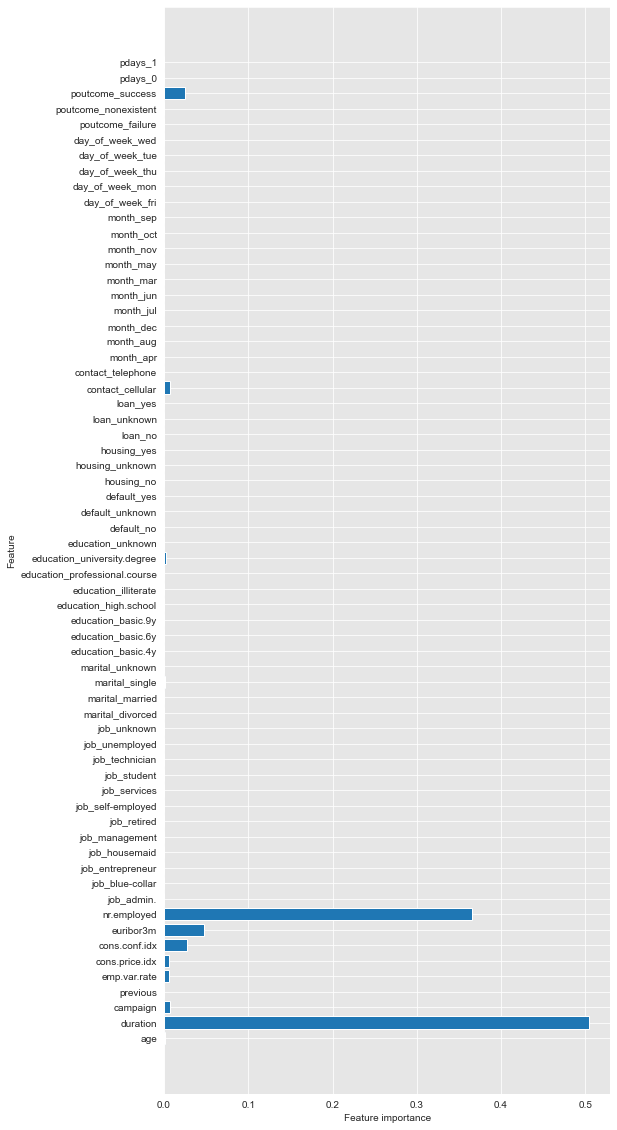

In [367]:
plot_feature_importances(best_params_decision_tree)

# Model 4 - Random Forest Classifier

In [221]:
random_forest_model = RandomForestClassifier()

In [225]:
random_forest_param_grid = {'n_estimators': [20, 40, 60],
                            'criterion':['gini', 'entropy'],
                            'max_depth':[None, 2, 4],
                            'min_samples_split':[10, 20],
                            'min_samples_leaf':[5, 10, 15]
                           }

In [226]:
# uncomment to run model!
# random_forest_grid_search = GridSearchCV(estimator = random_forest_model, 
#                                         param_grid = random_forest_param_grid,
#                                         scoring = 'roc_auc',
#                                         cv = 3,
#                                         n_jobs = -1)

In [227]:
random_forest_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20],
                         'n_estimators': [20, 40, 60]},
             scoring='roc_auc')

In [228]:
random_forest_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 60}

In [305]:
#predict on train
random_forest_preds_train = random_forest_grid_search.predict(X_train_scaled)

#predict on validation
random_forest_preds_validation = random_forest_grid_search.predict(X_val_scaled)

#store as variable
random_forest_scoring = roc_auc_score(random_forest_preds_train, y_train)

print(f" AUC score: {roc_auc_score(random_forest_preds_train, y_train)}")
print('Classification Report on Training Data', "\n")
print(classification_report(y_train, random_forest_preds_train))

print(f" AUC score: {roc_auc_score(random_forest_preds_validation, y_val)}")
print('Classification Report on Validation Data', "\n")
print(classification_report(y_val, random_forest_preds_validation))

 AUC score: 0.8762102449063165
Classification Report on Training Data 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     14620
           1       0.82      0.44      0.57      1850

    accuracy                           0.93     16470
   macro avg       0.88      0.71      0.76     16470
weighted avg       0.92      0.93      0.92     16470

 AUC score: 0.8098560432178084
Classification Report on Validation Data 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14652
           1       0.70      0.34      0.46      1818

    accuracy                           0.91     16470
   macro avg       0.81      0.66      0.70     16470
weighted avg       0.90      0.91      0.90     16470



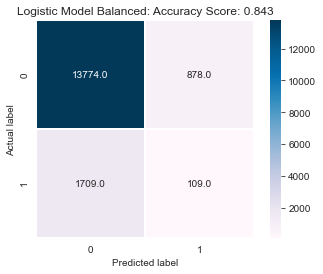

In [231]:
score = round(accuracy_score(y_val, random_forest_preds_train),3) 
confusion_matrix = cm(y_val, random_forest_preds_train)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Logistic Model Balanced: Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [232]:
mae_train = mean_absolute_error(random_forest_preds_train, y_train)
mse_train = mean_squared_error(random_forest_preds_train, y_train)
rmse_train = np.sqrt(mse)

mae_val = mean_absolute_error(random_forest_preds_validation, y_val)
mse_val = mean_squared_error(random_forest_preds_validation, y_val)
rmse_val = np.sqrt(mse)

print('Random Forest (Grid Search) Error Evaluation')
print()
print('Mean Absolute Error Train (MAE): %.2f' % mae_train)
print('Mean Squared Error Train (MSE): %.2f' % mse_train)
print('Root Mean Squared Error Train (RMSE): %.2f' % rmse_train)
print()
print('Mean Absolute Error Validation (MAE): %.2f' % mae_val)
print('Mean Squared Error Validation (MSE): %.2f' % mse_val)
print('Root Mean Squared Error Validation (RMSE): %.2f' % rmse_val)
print("\n")

Random Forest (Grid Search) Error Evaluation

Mean Absolute Error Train (MAE): 0.07
Mean Squared Error Train (MSE): 0.07
Root Mean Squared Error Train (RMSE): 0.30

Mean Absolute Error Validation (MAE): 0.09
Mean Squared Error Validation (MSE): 0.09
Root Mean Squared Error Validation (RMSE): 0.30




AUC: 0.8098560432178084


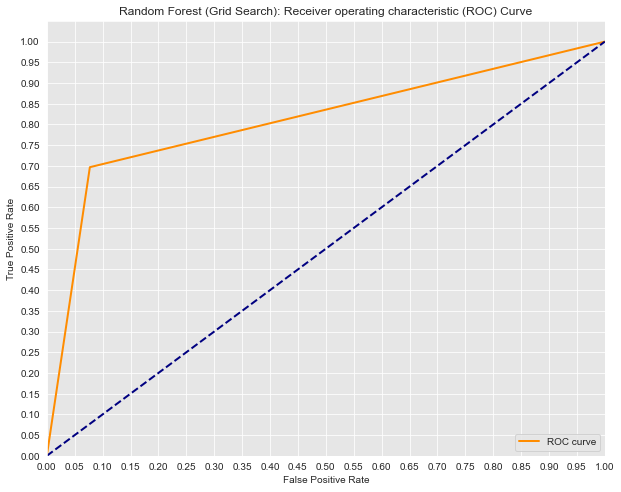

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

fpr, tpr, thresholds = roc_curve(random_forest_preds_validation, y_val)
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest (Grid Search): Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [239]:
best_params_random_forest = RandomForestClassifier(criterion = 'entropy',
                                       max_depth = None, 
                                       min_samples_leaf = 10,
                                       min_samples_split = 10,
                                       n_estimators = 60,
                                      )
                                     
                                       
                                       
best_params_random_forest.fit(X_train_scaled, y_train)


RandomForestClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10, n_estimators=60)

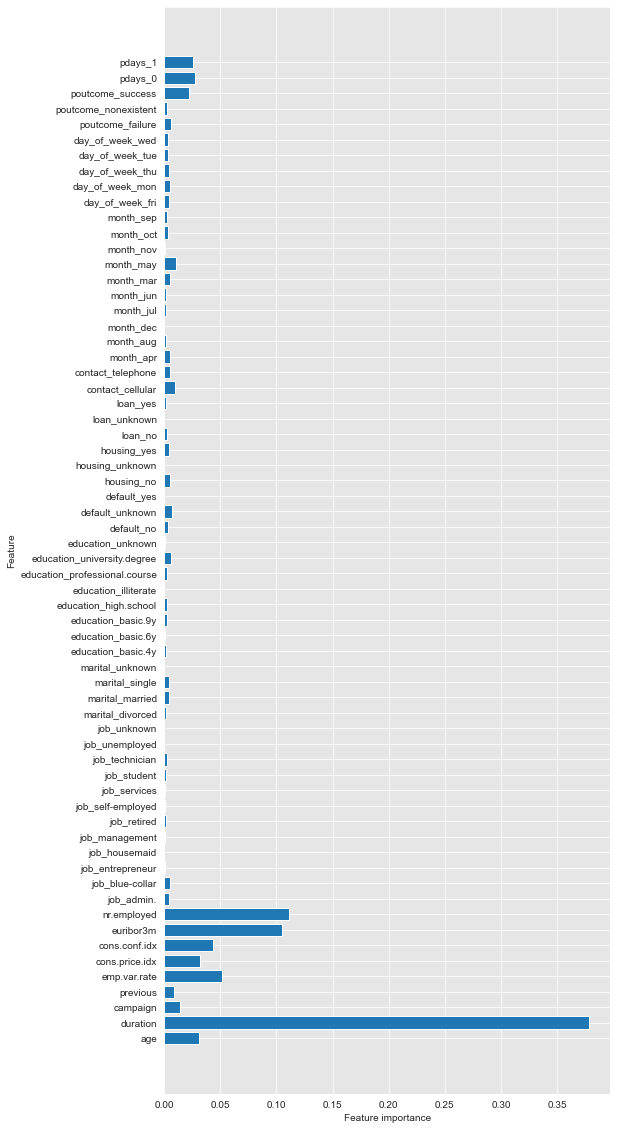

In [240]:
plot_feature_importances(best_params_random_forest)

# Model 5 - K-Nearest Neighbors

In [249]:
knn_model = KNeighborsClassifier()

In [250]:
knn_param_grid = {'n_neighbors': list(range(1, 20, 2)),
                  'weights':['uniform', 'distance'],
                  'leaf_size':[20, 30],
                  }
                            
                      

In [251]:
# uncomment to run model!
knn_grid_search = GridSearchCV(estimator = knn_model, 
                               param_grid = knn_param_grid,
                               scoring = 'roc_auc',
                               cv = 3,
                               n_jobs = -1)

In [252]:
knn_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [20, 30],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [253]:
knn_grid_search.best_params_

{'leaf_size': 20, 'n_neighbors': 19, 'weights': 'distance'}

In [306]:
#predict on train
knn_preds_train = knn_grid_search.predict(X_train_scaled)

#predict on validation
knn_preds_validation = knn_grid_search.predict(X_val_scaled)

#store as variable 
knn_scoring = roc_auc_score(knn_preds_train, y_train)

print(f" AUC score: {roc_auc_score(knn_preds_train, y_train)}")
print('Classification Report on Training Data', "\n")
print(classification_report(y_train, knn_preds_train))

print(f" AUC score: {roc_auc_score(knn_preds_validation, y_val)}")
print('Classification Report on Validation Data', "\n")
print(classification_report(y_val, knn_preds_validation))

 AUC score: 1.0
Classification Report on Training Data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14620
           1       1.00      1.00      1.00      1850

    accuracy                           1.00     16470
   macro avg       1.00      1.00      1.00     16470
weighted avg       1.00      1.00      1.00     16470

 AUC score: 0.7868469930097124
Classification Report on Validation Data 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14652
           1       0.65      0.39      0.48      1818

    accuracy                           0.91     16470
   macro avg       0.79      0.68      0.72     16470
weighted avg       0.90      0.91      0.90     16470



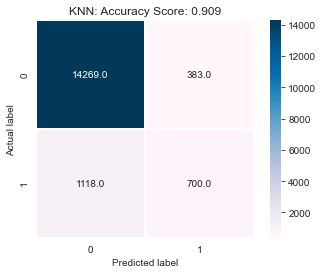

In [255]:
score = round(accuracy_score(y_val, knn_preds_validation),3) 
confusion_matrix = cm(y_val, knn_preds_validation)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('KNN: Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [256]:
mae_train = mean_absolute_error(knn_preds_train, y_train)
mse_train = mean_squared_error(knn_preds_train, y_train)
rmse_train = np.sqrt(mse)

mae_val = mean_absolute_error(knn_preds_validation, y_val)
mse_val = mean_squared_error(knn_preds_validation, y_val)
rmse_val = np.sqrt(mse)

print('KNN Error Evaluation')
print()
print('Mean Absolute Error Train (MAE): %.2f' % mae_train)
print('Mean Squared Error Train (MSE): %.2f' % mse_train)
print('Root Mean Squared Error Train (RMSE): %.2f' % rmse_train)
print()
print('Mean Absolute Error Validation (MAE): %.2f' % mae_val)
print('Mean Squared Error Validation (MSE): %.2f' % mse_val)
print('Root Mean Squared Error Validation (RMSE): %.2f' % rmse_val)
print("\n")

KNN Error Evaluation

Mean Absolute Error Train (MAE): 0.00
Mean Squared Error Train (MSE): 0.00
Root Mean Squared Error Train (RMSE): 0.30

Mean Absolute Error Validation (MAE): 0.09
Mean Squared Error Validation (MSE): 0.09
Root Mean Squared Error Validation (RMSE): 0.30




AUC: 0.7868469930097124


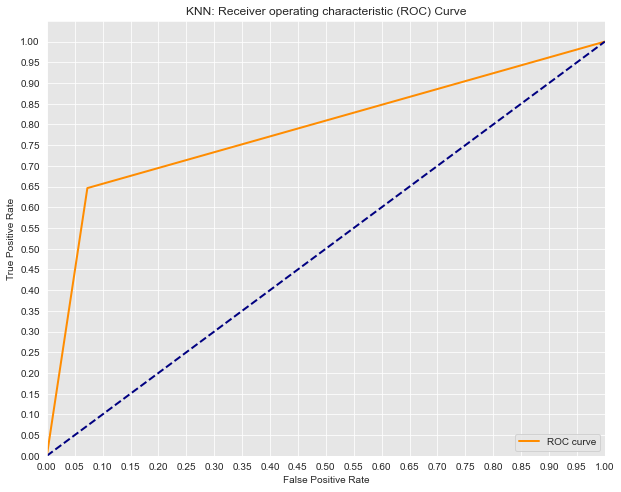

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

fpr, tpr, thresholds = roc_curve(knn_preds_validation, y_val)
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN: Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Model 6 - Gradient Boost

In [290]:
gradient_boost_model = GradientBoostingClassifier()
# gradient_boost.fit(X_train_scaled, y_train)

In [291]:
gradient_boost_param_grid = {'loss': ['deviance', 'exponential'],
                             'learning_rate':[0.1, 0.2, 0.3],
                             'n_estimators':[100, 110, 120]}
                            
                            

In [292]:
# uncomment to run model!
gradient_boost_grid_search = GridSearchCV(estimator = gradient_boost_model, 
                                        param_grid = gradient_boost_param_grid,
                                        scoring = 'roc_auc',
                                        cv = 3,
                                        n_jobs = -1)

In [293]:
gradient_boost_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 110, 120]},
             scoring='roc_auc')

In [294]:
gradient_boost_grid_search.best_params_

{'learning_rate': 0.3, 'loss': 'deviance', 'n_estimators': 110}

In [307]:
#predict on train
gradient_boost_preds_train = gradient_boost_grid_search.predict(X_train_scaled)

#predict on validation
gradient_boost_preds_validation = gradient_boost_grid_search.predict(X_val_scaled)

#store as variable
gradient_boost_scoring = roc_auc_score(gradient_boost_preds_train, y_train)

print(f" AUC score: {roc_auc_score(gradient_boost_preds_train, y_train)}")
print('Classification Report on Training Data', "\n")
print(classification_report(y_train, gradient_boost_preds_train))

print(f" AUC score: {roc_auc_score(gradient_boost_preds_validation, y_val)}")
print('Classification Report on Validation Data', "\n")
print(classification_report(y_val, gradient_boost_preds_validation))

 AUC score: 0.8755913262214441
Classification Report on Training Data 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14620
           1       0.79      0.65      0.71      1850

    accuracy                           0.94     16470
   macro avg       0.88      0.81      0.84     16470
weighted avg       0.94      0.94      0.94     16470

 AUC score: 0.7906544673178356
Classification Report on Validation Data 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14652
           1       0.64      0.54      0.58      1818

    accuracy                           0.92     16470
   macro avg       0.79      0.75      0.77     16470
weighted avg       0.91      0.92      0.91     16470



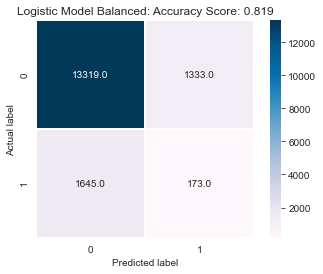

In [296]:
score = round(accuracy_score(y_val, gradient_boost_preds_train),3) 
confusion_matrix = cm(y_val, gradient_boost_preds_train)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Logistic Model Balanced: Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [297]:
mae_train = mean_absolute_error(gradient_boost_preds_train, y_train)
mse_train = mean_squared_error(gradient_boost_preds_train, y_train)
rmse_train = np.sqrt(mse)

mae_val = mean_absolute_error(gradient_boost_preds_validation, y_val)
mse_val = mean_squared_error(gradient_boost_preds_validation, y_val)
rmse_val = np.sqrt(mse)

print('Gradient Boost Error Evaluation')
print()
print('Mean Absolute Error Train (MAE): %.2f' % mae_train)
print('Mean Squared Error Train (MSE): %.2f' % mse_train)
print('Root Mean Squared Error Train (RMSE): %.2f' % rmse_train)
print()
print('Mean Absolute Error Validation (MAE): %.2f' % mae_val)
print('Mean Squared Error Validation (MSE): %.2f' % mse_val)
print('Root Mean Squared Error Validation (RMSE): %.2f' % rmse_val)
print("\n")

Gradient Boost Error Evaluation

Mean Absolute Error Train (MAE): 0.06
Mean Squared Error Train (MSE): 0.06
Root Mean Squared Error Train (RMSE): 0.30

Mean Absolute Error Validation (MAE): 0.08
Mean Squared Error Validation (MSE): 0.08
Root Mean Squared Error Validation (RMSE): 0.30




AUC: 0.7906544673178356


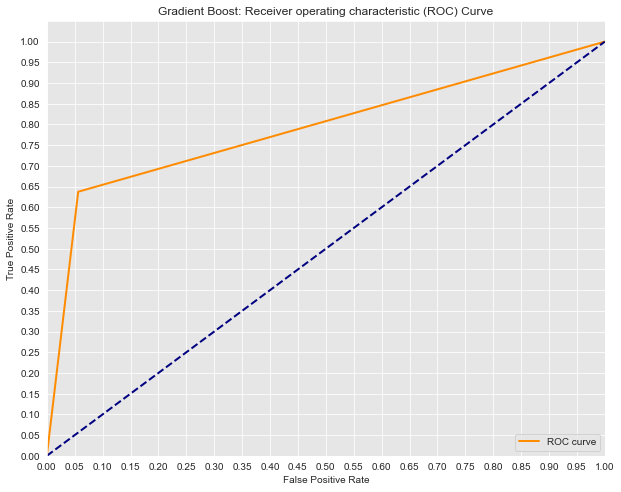

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

fpr, tpr, thresholds = roc_curve(gradient_boost_preds_validation, y_val)
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost: Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [299]:
best_params_gradient_boost = GradientBoostingClassifier(learning_rate = 0.3,
                                                        loss = 'deviance',
                                                        n_estimators = 110)
                                      
best_params_gradient_boost.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=110)

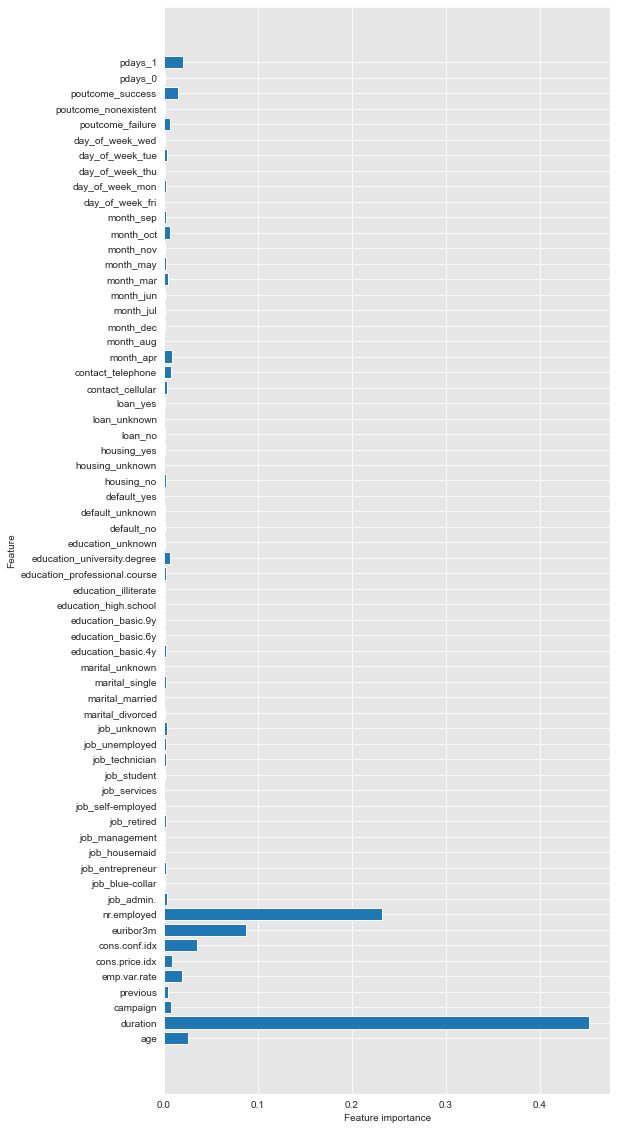

In [300]:
plot_feature_importances(best_params_gradient_boost)

# Model 7 - XG Boost

In [271]:
xg_boost_model = XGBClassifier()

In [272]:
xg_boost_param_grid = {'learning_rate': [0.1, 0.2],
                       'max_depth':[6],
                       'min_child_weight':[1,2],
                       'subsample':[0.5,0.7],
                       'n_estimators':[100],
                      }              

In [273]:
# uncomment to run model!
xg_boost_grid_search = GridSearchCV(estimator = xg_boost_model, 
                                        param_grid = xg_boost_param_grid,
                                        scoring = 'roc_auc',
                                        cv = 3,
                                        n_jobs = -1)

In [274]:
xg_boost_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [275]:
xg_boost_grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

In [308]:
#predict on train
xg_boost_preds_train = xg_boost_grid_search.predict(X_train_scaled)

#predict on validation
xg_boost_preds_validation = xg_boost_grid_search.predict(X_val_scaled)

#store as variable 
xg_boost_scoring = roc_auc_score(xg_boost_preds_train, y_train)

print(f" AUC score: {roc_auc_score(xg_boost_preds_train, y_train)}")
print('Classification Report on Training Data', "\n")
print(classification_report(y_train, xg_boost_preds_train))

print(f" AUC score: {roc_auc_score(xg_boost_preds_validation, y_val)}")
print('Classification Report on Validation Data', "\n")
print(classification_report(y_val, xg_boost_preds_validation))

 AUC score: 0.9034879495013681
Classification Report on Training Data 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14620
           1       0.84      0.71      0.77      1850

    accuracy                           0.95     16470
   macro avg       0.90      0.85      0.87     16470
weighted avg       0.95      0.95      0.95     16470

 AUC score: 0.791369805375264
Classification Report on Validation Data 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14652
           1       0.64      0.54      0.59      1818

    accuracy                           0.92     16470
   macro avg       0.79      0.75      0.77     16470
weighted avg       0.91      0.92      0.91     16470



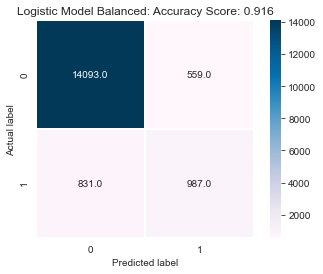

In [277]:
score = round(accuracy_score(y_val, xg_boost_preds_validation),3) 
confusion_matrix = cm(y_val, xg_boost_preds_validation)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('XG Boost Model Balanced: Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [278]:
mae_train = mean_absolute_error(xg_boost_preds_train, y_train)
mse_train = mean_squared_error(xg_boost_preds_train, y_train)
rmse_train = np.sqrt(mse)

mae_val = mean_absolute_error(xg_boost_preds_validation, y_val)
mse_val = mean_squared_error(xg_boost_preds_validation, y_val)
rmse_val = np.sqrt(mse)

print('Gradient Boost Error Evaluation')
print()
print('Mean Absolute Error Train (MAE): %.2f' % mae_train)
print('Mean Squared Error Train (MSE): %.2f' % mse_train)
print('Root Mean Squared Error Train (RMSE): %.2f' % rmse_train)
print()
print('Mean Absolute Error Validation (MAE): %.2f' % mae_val)
print('Mean Squared Error Validation (MSE): %.2f' % mse_val)
print('Root Mean Squared Error Validation (RMSE): %.2f' % rmse_val)
print("\n")

Gradient Boost Error Evaluation

Mean Absolute Error Train (MAE): 0.05
Mean Squared Error Train (MSE): 0.05
Root Mean Squared Error Train (RMSE): 0.30

Mean Absolute Error Validation (MAE): 0.08
Mean Squared Error Validation (MSE): 0.08
Root Mean Squared Error Validation (RMSE): 0.30




AUC: 0.791369805375264


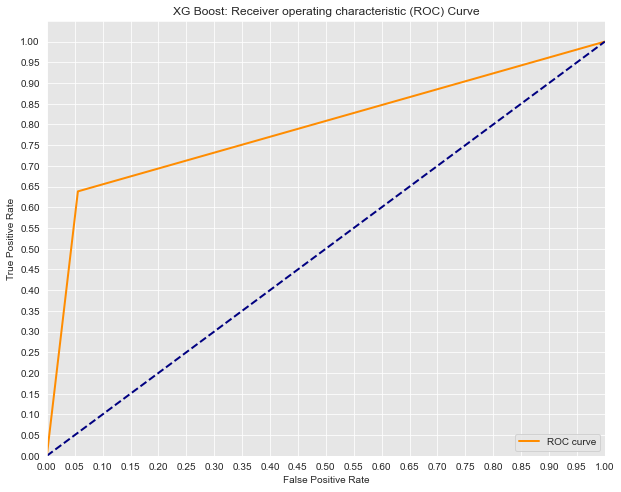

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

fpr, tpr, thresholds = roc_curve(xg_boost_preds_validation, y_val)
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost: Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [281]:
best_params_xg_boost = XGBClassifier(learning_rate = 0.1,
                                       max_depth = 6, 
                                       min_child_weight = 1,
                                       n_estimators = 100,
                                       subsample = 0.7,)
                                     
best_params_xg_boost.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

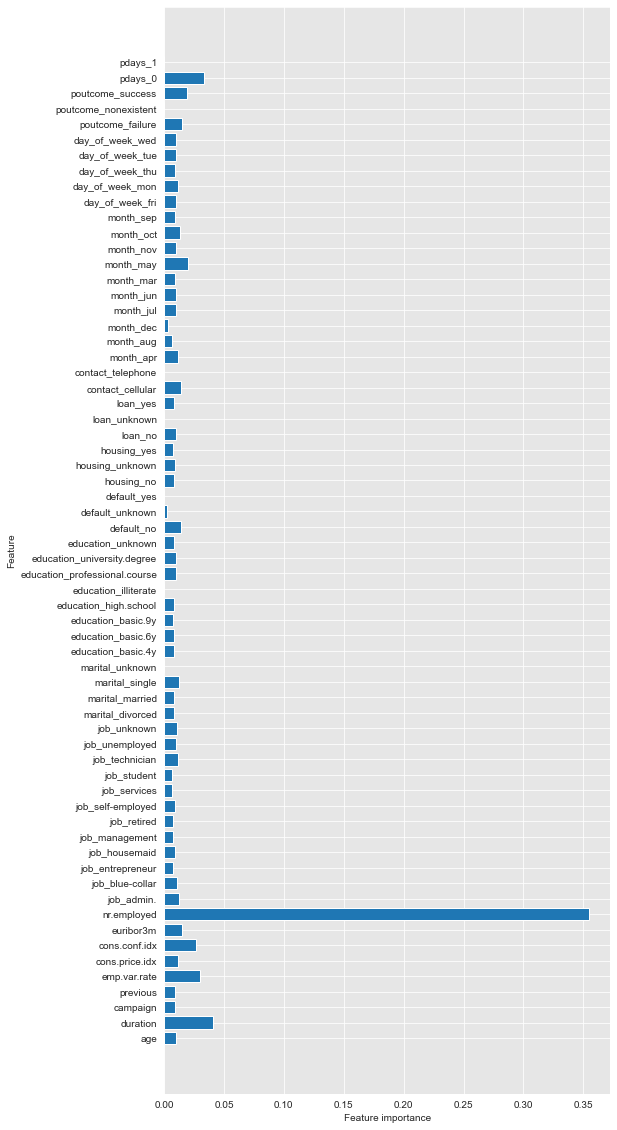

In [282]:
plot_feature_importances(best_params_xg_boost)

# Model Results

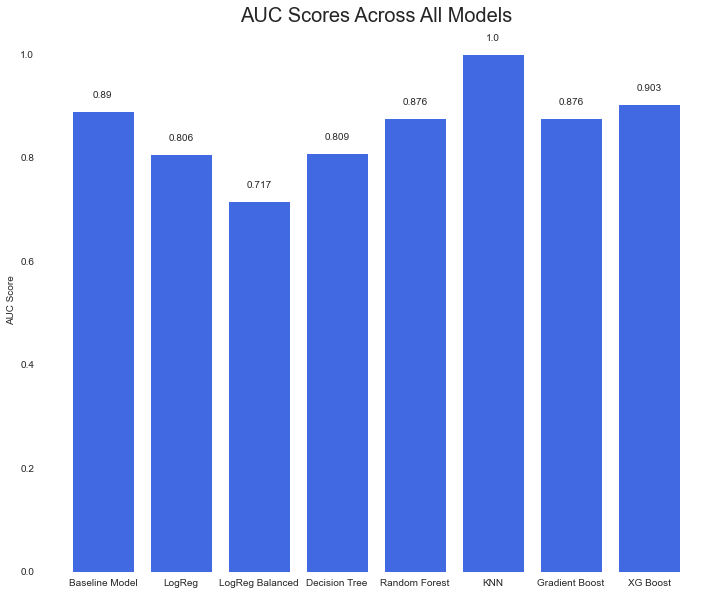

In [368]:
#plot out model results across all models

x_axis = ['Baseline Model', 'LogReg', 'LogReg Balanced', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boost', 'XG Boost']
y_axis = [baseline_model_scoring, logreg_scoring, logreg_balanced_scoring, decision_tree_scoring, random_forest_scoring, knn_scoring, gradient_boost_scoring, xg_boost_scoring] 

fig, ax = plt.subplots(figsize = (12, 10))
ax.bar(x_axis, y_axis, color = 'royalblue')
ax.set_title('AUC Scores Across All Models', fontsize = 20)
ax.set_ylabel('AUC Score')
ax.set_facecolor('white')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    label_text = round(height, 3)
    
    label_x = x + width / 2
    label_y = y + height + 0.03
    ax.text(label_x, label_y, label_text, ha = 'center', va = 'center', fontsize = 10)
plt.grid(False)
plt.show();

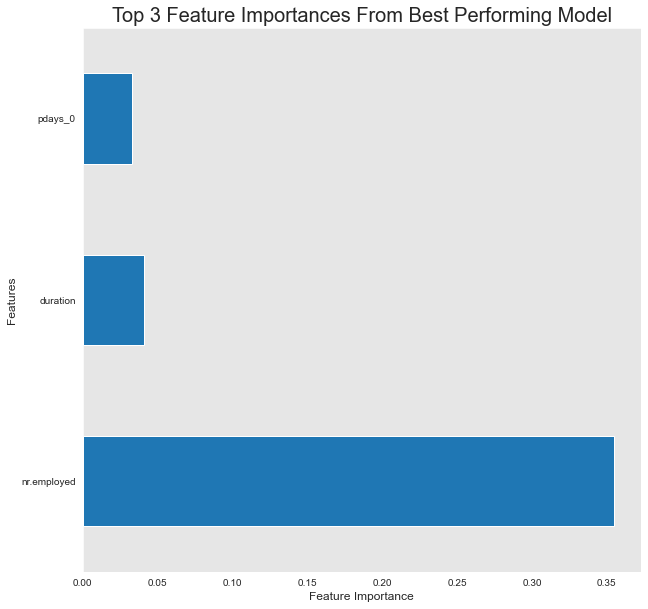

In [389]:
pd.Series(best_params_xg_boost.feature_importances_, index = feature_names).nlargest(3).plot(kind='barh', figsize = (10, 10))

plt.title('Top 3 Feature Importances From Best Performing Model', fontsize = 20)
plt.ylabel('Features', fontsize = 12)
plt.xlabel('Feature Importance', fontsize = 12)
plt.grid(False)

plt.plot;